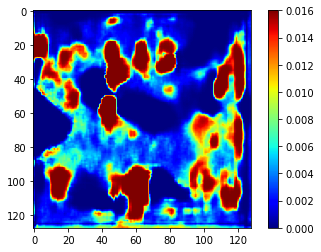

In [23]:
import scipy as io
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

def strain_z_calculation(poisson_ratio, strain_x, strain_y):
    result = -poisson_ratio *(strain_x+strain_y)/(1-poisson_ratio)
    return result

def effective_strain_z(poisson_ratio, strain_x, strain_y, strain_xy):
    strain_z = strain_z_calculation(poisson_ratio,strain_x, strain_y)
    result = 2 * np.sqrt(strain_x**2 + strain_y**2 + strain_z**2 - strain_x*strain_y - strain_x*strain_z - strain_y*strain_z + 3*strain_xy**2) / 3
    return result

def dic_load_data(path, number):
    strain = np.load(path+'/'+str(number)+'.npy')
    return strain


real_dic_list = []
fake_dic_list = []

img_number = 270
xx = dic_load_data('../predict_strain_filed_exx/cycle_data/datasets/result', img_number)
xy = dic_load_data('../predict_strain_filed_exy/cycle_data/datasets/result', img_number)
yy = dic_load_data('../predict_strain_filed_eyy/cycle_data/datasets/result', img_number)
xx = (xx + 1)*0.008
xy = (xy + 1)*0.008
yy = (yy + 1)*0.008

effective_strain = effective_strain_z(0.33, xx, yy, xy)[0]
plt.imshow(yy[0],cmap='jet')
plt.colorbar()

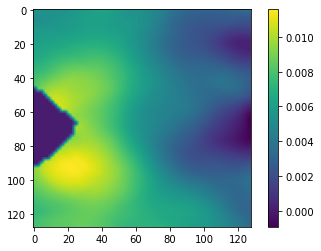

In [26]:
yy = dic_load_data('../predict_strain_filed_eyy/cycle_data/datasets/testA', img_number)
plt.imshow(yy)
plt.colorbar()